In [ ]:
!pip install kaggle

In [ ]:
import os
# Create the Kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)
# Move your kagglepdtest2.json file into this directory
!mv kagglepdtest2.json /root/.kaggle/
# Set correct file permissions
!chmod 600 /root/.kaggle/kagglepdtest2.json


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:29<00:00, 218MB/s]
100% 2.70G/2.70G [00:29<00:00, 97.8MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip -d /content/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import EfficientNetV2L

import random
import os
import warnings
warnings.filterwarnings('ignore')
print('compelete')

compelete


In [ ]:
image_shape = (224, 224)
batch_size = 64

# Adjusting paths for Colab
train_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
valid_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"
# apply scaling only becouse data already augmented
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# load training data
print("Training Images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

# load validation data (20% of training data)
print("Validating Images:")
valid_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

# load test data (consider validation data as test data)
print('Test Images:')
test_data = test_datagen.flow_from_directory(valid_dir,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Training Images:
Found 56251 images belonging to 38 classes.
Validating Images:
Found 14044 images belonging to 38 classes.
Test Images:
Found 17572 images belonging to 38 classes.


In [ ]:
# show how data store
images, labels = next(iter(train_data))
print(f'shape of image is : {images[0].shape}')
print(f'label  \n{labels[0]}')

shape of image is : (224, 224, 3)
label  
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# show all diseases in dataset
diseases = os.listdir(train_dir)
print(diseases)

['Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___healthy', 'Strawberry___healthy', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___healthy', 'Raspberry___healthy', 'Blueberry___healthy', 'Potato___Early_blight', 'Soybean___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Apple___Apple_scab', 'Tomato___Early_blight', 'Squash___Powdery_mildew', 'Grape___Black_rot', 'Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot', 'Potato___healthy', 'Apple___Cedar_apple_rust', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'A

In [ ]:
import os

# Adjust the train_dir path for Colab
train_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"

# Extract class names from the folder names
class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

print("Class names:", class_names)

import json

# Save the class names to a JSON file in Colab's accessible directory
with open('/content/class_names.json', 'w') as f:
    json.dump(class_names, f)


Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

In [ ]:
# identify uniqe plant in dataset
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
print(f'number of different plants is :{len(plants)}')
print(plants)

number of different plants is :14
['Tomato', 'Grape', 'Strawberry', 'Corn_(maize)', 'Peach', 'Raspberry', 'Blueberry', 'Potato', 'Soybean', 'Cherry_(including_sour)', 'Apple', 'Squash', 'Pepper,_bell', 'Orange']


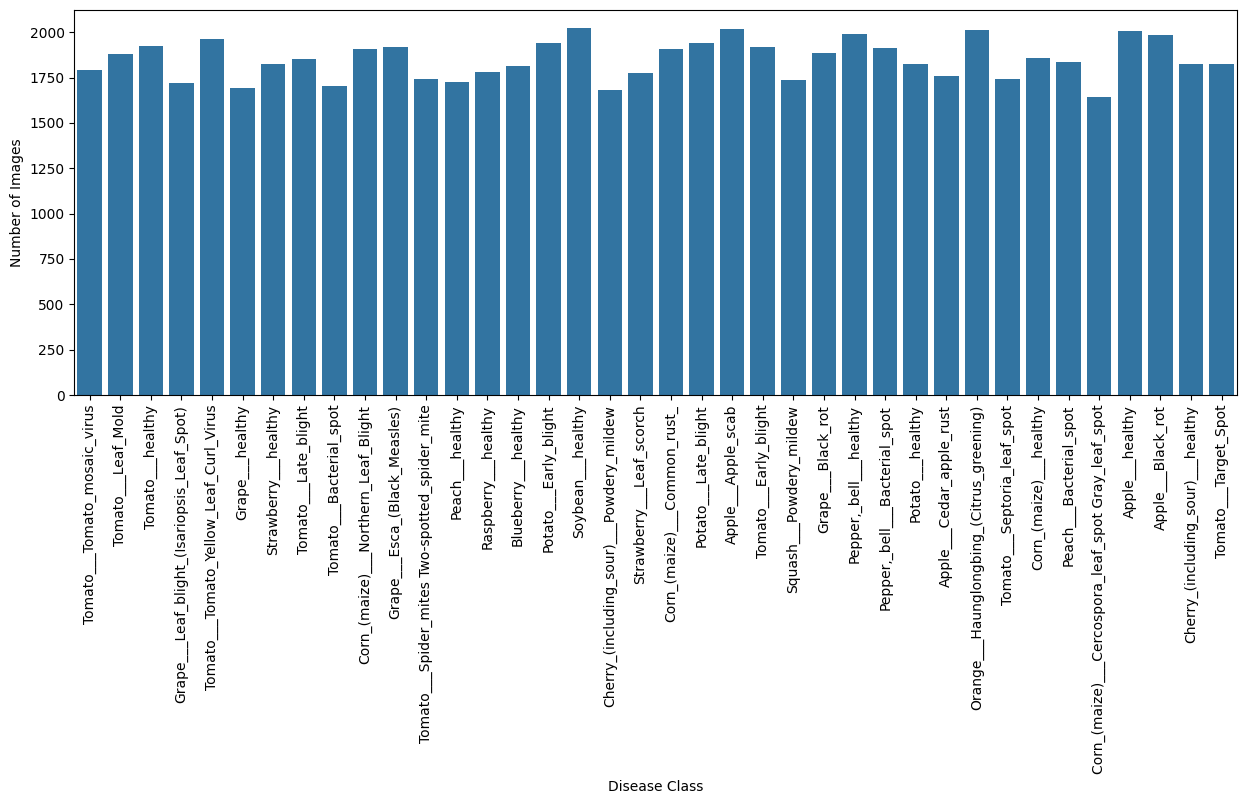

In [ ]:
# show number of each class
dic = {}
for Class in diseases:
    dic[Class] = len(os.listdir(train_dir + '/' + Class))

df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

# df = df.sort_values(by="Number of Images", ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=df ,x='Disease Class' ,y= 'Number of Images' )
plt.xticks(rotation=90)
plt.show()

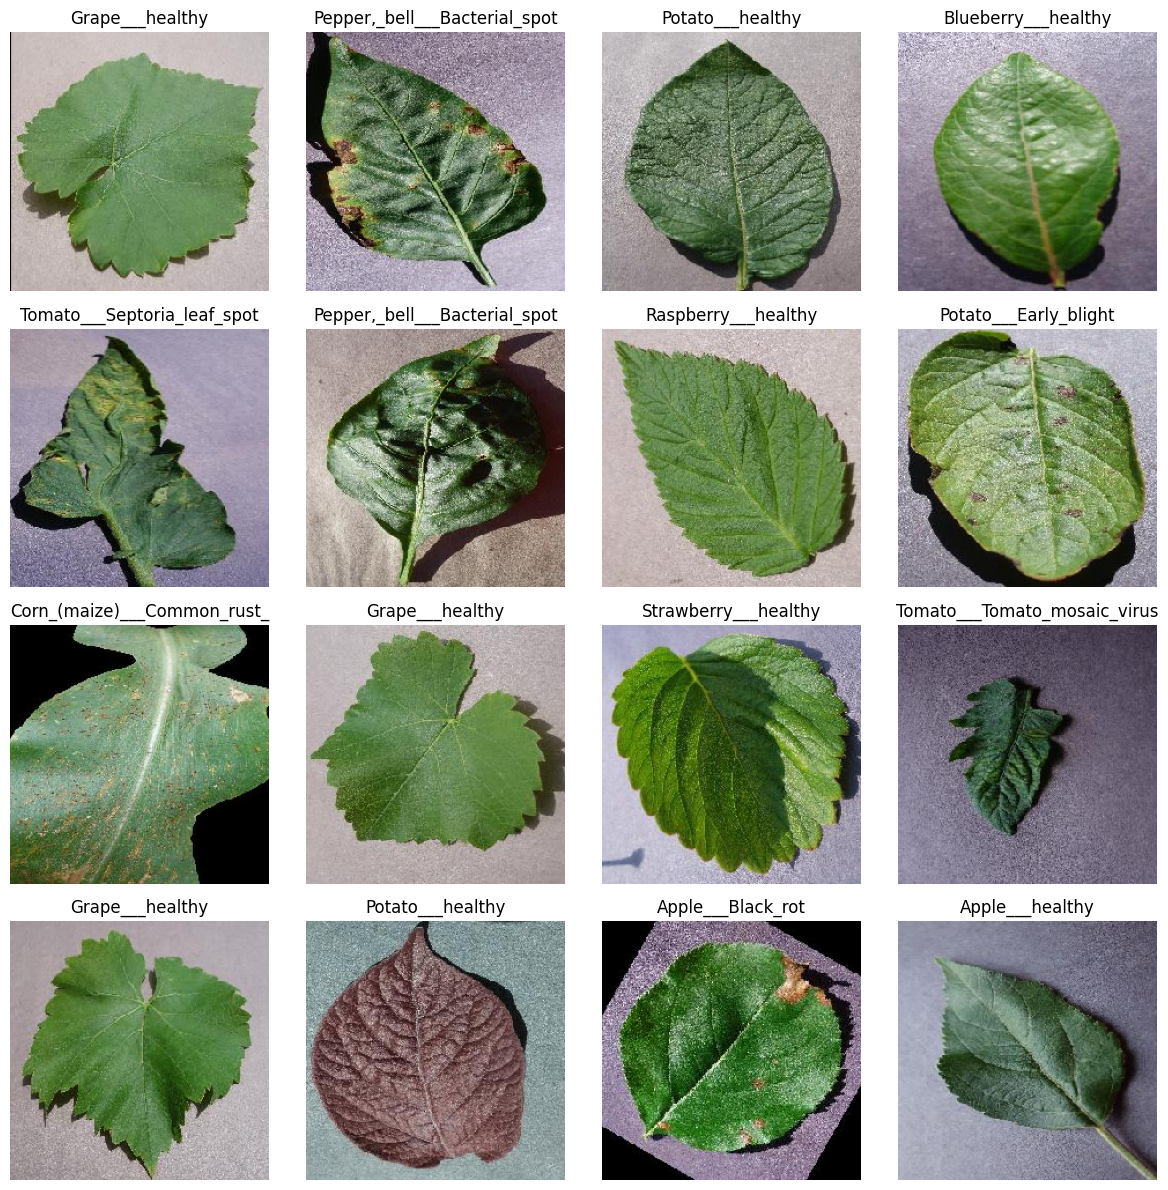

In [ ]:
import random
# select a specific batch
images, labels = next(iter(train_data))

# select 16 image by random
indices = random.sample(range(len(images)), 16)
selected_images = images[indices]
selected_labels = labels[indices]

class_names = list(train_data.class_indices.keys())

# plotting
plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(class_names[np.argmax(selected_labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    # accuracy curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # loss curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
def predict_labels_and_display(model_path, test_dir='/kaggle/input/new-plant-diseases-dataset/test/test', image_size=(224, 224)):
    # load the best model
    best_model = load_model(model_path)

    true_labels = []
    predicted_labels = []
    images = []

    for filename in os.listdir(test_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # load test images
            img_path = os.path.join(test_dir, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # predict
            prediction = best_model.predict(img_array, verbose=0)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # extract the label (name of image)
            true_label = filename.split('.')[0]

            # get the prediction class
            class_labels = list(train_data.class_indices.keys())
            predicted_label = class_labels[predicted_class]

            true_labels.append(true_label)
            predicted_labels.append(predicted_label)
            images.append(img)

    # randomly select three images
    selected_indices = random.sample(range(len(images)), 3)

    # show selected images
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(f'True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Model Architecture
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'elu',input_shape=(224,224,3), kernel_initializer=GlorotNormal()))
model.add(Conv2D(32, (3,3), activation='elu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='elu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(64, (3,3), activation='elu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='elu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(128, (3,3), activation='elu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='elu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='elu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='elu', kernel_initializer=GlorotNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 365,446 (1.39 MB)

 Trainable params: 364,550 (1.39 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the callbacks
model_checkpoint = ModelCheckpoint('/content/cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

# Train the model
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=10,
                    batch_size=64,
                    callbacks=[model_checkpoint, early_stopping])


Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.3503 - loss: 2.3208
Epoch 1: val_accuracy improved from -inf to 0.64547, saving model to /content/cnn_model.keras
879/879 ━━━━━━━━━━━━━━━━━━━━ 280s 318ms/step - accuracy: 0.3505 - loss: 2.3202 - val_accuracy: 0.6455 - val_loss: 1.1866
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7350 - loss: 0.8716
Epoch 2: val_accuracy improved from 0.64547 to 0.77599, saving model to /content/cnn_model.keras
879/879 ━━━━━━━━━━━━━━━━━━━━ 252s 285ms/step - accuracy: 0.7351 - loss: 0.8714 - val_accuracy: 0.7760 - val_loss: 0.7061
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8445 - loss: 0.4985
Epoch 3: val_accuracy improved from 0.77599 to 0.89212, saving model to /content/cnn_model.keras
879/879 ━━━━━━━━━━━━━━━━━━━━ 257s 291ms/step - accuracy: 0.8445 - loss: 0.4984 - val_accuracy: 0.8921 - val_loss: 0.3198
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.8930 - loss: 0.34

In [ ]:
# Save the model to Google Drive
model.save('/content/drive/My Drive/pdtest/cnn_model.keras')

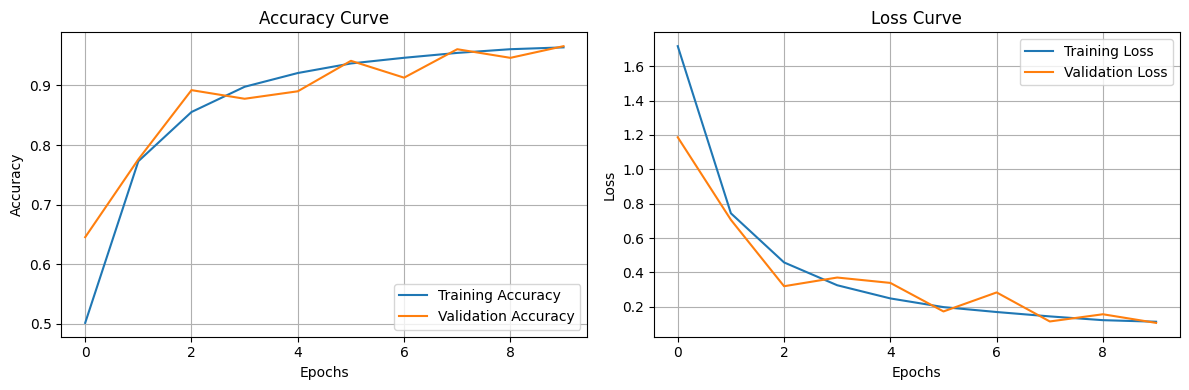

In [ ]:
# show learning curves
plot_learning_curves(history)

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model from Google Drive
best_model = load_model('/content/drive/My Drive/pdtest/cnn_model.keras')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


275/275 ━━━━━━━━━━━━━━━━━━━━ 48s 169ms/step - accuracy: 0.9772 - loss: 0.0704
Test Loss: 0.0928
Test Accuracy: 0.9704


In [ ]:
import os
print(os.listdir('/content/dataset'))




['new plant diseases dataset(augmented)', 'test', 'New Plant Diseases Dataset(Augmented)']


In [ ]:
print(os.listdir('/content/dataset/New Plant Diseases Dataset(Augmented)'))
print(os.listdir('/content/dataset/test'))


['New Plant Diseases Dataset(Augmented)']
['test']


In [ ]:
test_path = '/content/dataset/test/'
print(os.listdir(test_path))


['test']


In [ ]:
test_folder_path = '/content/dataset/test/test/'
print(os.listdir(test_folder_path))


['AppleCedarRust3.JPG', 'TomatoYellowCurlVirus4.JPG', 'PotatoEarlyBlight2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoYellowCurlVirus5.JPG', 'AppleCedarRust4.JPG', 'TomatoYellowCurlVirus6.JPG', 'TomatoHealthy3.JPG', 'TomatoHealthy4.JPG', 'TomatoEarlyBlight5.JPG', 'AppleScab3.JPG', 'TomatoEarlyBlight1.JPG', 'CornCommonRust2.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust1.JPG', 'TomatoYellowCurlVirus3.JPG', 'PotatoEarlyBlight3.JPG', 'CornCommonRust1.JPG', 'TomatoYellowCurlVirus1.JPG', 'PotatoHealthy1.JPG', 'TomatoYellowCurlVirus2.JPG', 'PotatoHealthy2.JPG', 'PotatoEarlyBlight5.JPG', 'TomatoHealthy2.JPG', 'TomatoEarlyBlight6.JPG', 'PotatoEarlyBlight1.JPG', 'AppleScab1.JPG', 'TomatoEarlyBlight4.JPG', 'AppleScab2.JPG', 'PotatoEarlyBlight4.JPG', 'CornCommonRust3.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoHealthy1.JPG']


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/My Drive/pdtest/cnn_model.keras')  # Update path as per your file location


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step


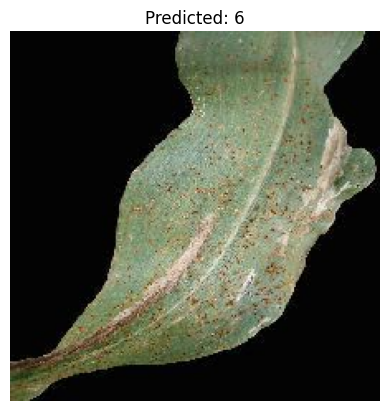

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import random

# Path to test images
test_image_dir = '/content/dataset/test/test/'

# List test images
test_images = os.listdir(test_image_dir)

# Pick a random image from the test set
random_image_file = random.choice(test_images)
image_path = os.path.join(test_image_dir, random_image_file)

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # assuming model expects 224x224 images
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Adjust for model preprocessing if needed

# Make prediction
prediction = model.predict(img_array)

# Display the image and prediction result
plt.imshow(img)
plt.title(f"Predicted: {np.argmax(prediction)}")  # You can map the prediction output to label names if needed
plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model_path, test_data, model_name):
    # load model
    model = tf.keras.models.load_model(model_path)

    # predict
    y_pred = model.predict(test_data)
    y_pred_classes = y_pred.argmax(axis=1)

    # get true classes
    y_true = test_data.classes

    class_labels = list(test_data.class_indices.keys())

    accuracy = accuracy_score(y_true, y_pred_classes)

    report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)

    df_report = pd.DataFrame(report).transpose()

    df_report.loc['accuracy'] = [accuracy, None, None, None]

    df_report['model'] = model_name

    return df_report

cnn_model_path = 'cnn_model.keras'

cnn_report = evaluate_model(cnn_model_path, test_data, 'CNN')

reports = pd.concat([cnn_report])

reports = reports.reset_index().rename(columns={'index': 'metric'})

reports

275/275 ━━━━━━━━━━━━━━━━━━━━ 45s 155ms/step


metric  precision    recall  \
0                                  Apple___Apple_scab   0.990020  0.984127   
1                                   Apple___Black_rot   0.984158  1.000000   
2                            Apple___Cedar_apple_rust   0.984234  0.993182   
3                                     Apple___healthy   0.976143  0.978088   
4                                 Blueberry___healthy   0.991189  0.991189   
5            Cherry_(including_sour)___Powdery_mildew   1.000000  0.966746   
6                   Cherry_(including_sour)___healthy   0.987013  1.000000   
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   0.884354  0.951220   
8                         Corn_(maize)___Common_rust_   0.997868  0.981132   
9                 Corn_(maize)___Northern_Leaf_Blight   0.959911  0.903564   
10                             Corn_(maize)___healthy   0.995717  1.000000   
11                                  Grape___Black_rot   0.993289  0.940678   
12                       Grape___Esca_(Black_Measles)   0.989540  0.985417   
13         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)   0.947137  1.000000   
14                                    Grape___healthy   0.974478  0.992908   
15           Orange___Haunglongbing_(Citrus_greening)   0.995984  0.986083   
16                             Peach___Bacterial_spot   0.929006  0.997821   
17                                    Peach___healthy   0.953642  1.000000   
18                      Pepper,_bell___Bacterial_spot   0.990950  0.916318   
19                             Pepper,_bell___healthy   0.964215  0.975855   
20                              Potato___Early_blight   0.971888  0.997938   
21                               Potato___Late_blight   1.000000  0.884536   
22                                   Potato___healthy   1.000000  0.951754   
23                                Raspberry___healthy   0.995423  0.977528   
24                                  Soybean___healthy   0.989583  0.940594   
25                            Squash___Powdery_mildew   0.997669  0.986175   
26                           Strawberry___Leaf_scorch   0.993182  0.984234   
27                               Strawberry___healthy   0.986985  0.997807   
28                            Tomato___Bacterial_spot   0.951724  0.974118   
29                              Tomato___Early_blight   0.835420  0.972917   
30                               Tomato___Late_blight   0.930804  0.900648   
31                                 Tomato___Leaf_Mold   0.968880  0.993617   
32                        Tomato___Septoria_leaf_spot   0.949192  0.942661   
33      Tomato___Spider_mites Two-spotted_spider_mite   0.943182  0.954023   
34                               Tomato___Target_Spot   0.918239  0.958425   
35             Tomato___Tomato_Yellow_Leaf_Curl_Virus   0.997835  0.940816   
36                       Tomato___Tomato_mosaic_virus   0.993274  0.988839   
37                                   Tomato___healthy   0.991684  0.991684   
38                                           accuracy   0.970351       NaN   
39                                          macro avg   0.971153  0.970596   
40                                       weighted avg   0.971595  0.970351   

    f1-score  support model  
0   0.987065    504.0   CNN  
1   0.992016    497.0   CNN  
2   0.988688    440.0   CNN  
3   0.977114    502.0   CNN  
4   0.991189    454.0   CNN  
5   0.983092    421.0   CNN  
6   0.993464    456.0   CNN  
7   0.916569    410.0   CNN  
8   0.989429    477.0   CNN  
9   0.930886    477.0   CNN  
10  0.997854    465.0   CNN  
11  0.966268    472.0   CNN  
12  0.987474    480.0   CNN  
13  0.972851    430.0   CNN  
14  0.983607    423.0   CNN  
15  0.991009    503.0   CNN  
16  0.962185    459.0   CNN  
17  0.976271    432.0   CNN  
18  0.952174    478.0   CNN  
19  0.970000    497.0   CNN  
20  0.984741    485.0   CNN  
21  0.938731    485.0   CNN  
22  0.975281    456.0   CNN  
23  0.986395    445.0   CNN  
24  0.964467    505.

In [ ]:
pd.set_option('display.max_rows', 123)

reports

metric  precision    recall  \
0                                  Apple___Apple_scab   0.990020  0.984127   
1                                   Apple___Black_rot   0.984158  1.000000   
2                            Apple___Cedar_apple_rust   0.984234  0.993182   
3                                     Apple___healthy   0.976143  0.978088   
4                                 Blueberry___healthy   0.991189  0.991189   
5            Cherry_(including_sour)___Powdery_mildew   1.000000  0.966746   
6                   Cherry_(including_sour)___healthy   0.987013  1.000000   
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   0.884354  0.951220   
8                         Corn_(maize)___Common_rust_   0.997868  0.981132   
9                 Corn_(maize)___Northern_Leaf_Blight   0.959911  0.903564   
10                             Corn_(maize)___healthy   0.995717  1.000000   
11                                  Grape___Black_rot   0.993289  0.940678   
12                       Grape___Esca_(Black_Measles)   0.989540  0.985417   
13         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)   0.947137  1.000000   
14                                    Grape___healthy   0.974478  0.992908   
15           Orange___Haunglongbing_(Citrus_greening)   0.995984  0.986083   
16                             Peach___Bacterial_spot   0.929006  0.997821   
17                                    Peach___healthy   0.953642  1.000000   
18                      Pepper,_bell___Bacterial_spot   0.990950  0.916318   
19                             Pepper,_bell___healthy   0.964215  0.975855   
20                              Potato___Early_blight   0.971888  0.997938   
21                               Potato___Late_blight   1.000000  0.884536   
22                                   Potato___healthy   1.000000  0.951754   
23                                Raspberry___healthy   0.995423  0.977528   
24                                  Soybean___healthy   0.989583  0.940594   
25                            Squash___Powdery_mildew   0.997669  0.986175   
26                           Strawberry___Leaf_scorch   0.993182  0.984234   
27                               Strawberry___healthy   0.986985  0.997807   
28                            Tomato___Bacterial_spot   0.951724  0.974118   
29                              Tomato___Early_blight   0.835420  0.972917   
30                               Tomato___Late_blight   0.930804  0.900648   
31                                 Tomato___Leaf_Mold   0.968880  0.993617   
32                        Tomato___Septoria_leaf_spot   0.949192  0.942661   
33      Tomato___Spider_mites Two-spotted_spider_mite   0.943182  0.954023   
34                               Tomato___Target_Spot   0.918239  0.958425   
35             Tomato___Tomato_Yellow_Leaf_Curl_Virus   0.997835  0.940816   
36                       Tomato___Tomato_mosaic_virus   0.993274  0.988839   
37                                   Tomato___healthy   0.991684  0.991684   
38                                           accuracy   0.970351       NaN   
39                                          macro avg   0.971153  0.970596   
40                                       weighted avg   0.971595  0.970351   

    f1-score  support model  
0   0.987065    504.0   CNN  
1   0.992016    497.0   CNN  
2   0.988688    440.0   CNN  
3   0.977114    502.0   CNN  
4   0.991189    454.0   CNN  
5   0.983092    421.0   CNN  
6   0.993464    456.0   CNN  
7   0.916569    410.0   CNN  
8   0.989429    477.0   CNN  
9   0.930886    477.0   CNN  
10  0.997854    465.0   CNN  
11  0.966268    472.0   CNN  
12  0.987474    480.0   CNN  
13  0.972851    430.0   CNN  
14  0.983607    423.0   CNN  
15  0.991009    503.0   CNN  
16  0.962185    459.0   CNN  
17  0.976271    432.0   CNN  
18  0.952174    478.0   CNN  
19  0.970000    497.0   CNN  
20  0.984741    485.0   CNN  
21  0.938731    485.0   CNN  
22  0.975281    456.0   CNN  
23  0.986395    445.0   CNN  
24  0.964467    505.

In [ ]:
x =reports[reports['metric'] == 'macro avg']
x

metric  precision    recall  f1-score  support model
39  macro avg   0.971153  0.970596   0.97036  17572.0   CNN